## Naval Mine AI Program: Roack or Mine Identifier

Tensor flow - General Model creation steps:

1. Read dataset and create appropriate variables(X, y, W, b)
2. Model to predict
2. Loss function - how far predicted output is from desired output.
3. Minimize the loss function - Optimizer (user argument learning rate) - Gives New W and b
4. Evaluate accuracy

In [1]:
#Load Pre-requisite libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# One hot encode output variable to separate classification variables
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read data to pandas data frame and set index and column names

columns = list(range(0, 61))
df = pd.read_csv("C:\\Users\\hmnsh\\repos\\edureka\\sonar\\sonar.csv", names=columns, index_col=False)
df.shape

(208, 61)

In [3]:
#Separate input and output variables
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

In [4]:
y1 = df[df.columns[60]]

In [5]:
#perform label and ohe hot encoding to avoid ordering issue

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
Y.shape

(208, 2)

In [6]:
# shuffle rows - mixing up 

X, Y = shuffle(X, Y, random_state=1)

# train and test split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

In [7]:
# print shapes of data splits

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(166, 60)
(166, 2)
(42, 60)
(42, 2)


In [8]:
# params and tensor varibles

learning_rate = 0.3 # loss minimizing steps
training_epochs = 800 # number of iterations to minimize W and b
cost_history = np.empty(shape=[1], dtype=float)  # mse values
n_dim = X.shape[1] # Number of columns
print("ndim:", n_dim) # total columns for later use in model and parameters creation

n_class = 2 
model_path = "C:\\Users\\hmnsh\\repos\\edureka\\sonar"

ndim: 60


In [9]:
# Hidden layer details and neurons for each layer

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) # for each row input
y_ = tf.placeholder(tf.float32, [None, n_class]) # for each row output
W = tf.Variable(tf.zeros([n_dim, n_class])) #intialized weights to zeros
b = tf.Variable(tf.zeros([n_class])) #intialized biases to zeros

In [10]:
# weights and biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
}

# Initialize all variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [11]:
# Define the model

def multilayer_perc(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # hidden layer 1 with sigmoid activation

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # hidden layer 2 with sigmoid activation

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # hidden layer 3 with sigmoid activation

    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # hidden layer 4 with relu activation

    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer

# call model

y = multilayer_perc(x, weights, biases)

# define cost function and optimizer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
# cost and accuracy - running multilayer_perceptron - training and accuracy

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print( "Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y: test_y} )))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)

    print('epoch ', epoch, '-cost ', cost, '-mse', mse, '-Train Accuracy', accuracy)

save_path = saver.save(sess, model_path)
print('Model Saved in file: %s' % save_path)

epoch  0 -cost  40.118187 -mse Tensor("Mean_2:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  1 -cost  42.887985 -mse Tensor("Mean_4:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  2 -cost  3.4357057 -mse Tensor("Mean_6:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  3 -cost  10.765909 -mse Tensor("Mean_8:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  4 -cost  1.2333616 -mse Tensor("Mean_10:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  5 -cost  0.7671475 -mse Tensor("Mean_12:0", shape=(), dtype=float64) -Train Accuracy 0.44578314
epoch  6 -cost  0.83952534 -mse Tensor("Mean_14:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  7 -cost  1.0207981 -mse Tensor("Mean_16:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  8 -cost  0.7102595 -mse Tensor("Mean_18:0", shape=(), dtype=float64) -Train Accuracy 0.44578314
epoch  9 -cost  0.71835506 -mse Tensor("Mean_20:0", shape=(), dtype=float64) -T

epoch  82 -cost  0.65306044 -mse Tensor("Mean_166:0", shape=(), dtype=float64) -Train Accuracy 0.6325301
epoch  83 -cost  0.63864565 -mse Tensor("Mean_168:0", shape=(), dtype=float64) -Train Accuracy 0.60240966
epoch  84 -cost  0.65504855 -mse Tensor("Mean_170:0", shape=(), dtype=float64) -Train Accuracy 0.6325301
epoch  85 -cost  0.6422274 -mse Tensor("Mean_172:0", shape=(), dtype=float64) -Train Accuracy 0.5903614
epoch  86 -cost  0.65783805 -mse Tensor("Mean_174:0", shape=(), dtype=float64) -Train Accuracy 0.61445785
epoch  87 -cost  0.6309748 -mse Tensor("Mean_176:0", shape=(), dtype=float64) -Train Accuracy 0.6084337
epoch  88 -cost  0.644479 -mse Tensor("Mean_178:0", shape=(), dtype=float64) -Train Accuracy 0.6385542
epoch  89 -cost  0.6267228 -mse Tensor("Mean_180:0", shape=(), dtype=float64) -Train Accuracy 0.6204819
epoch  90 -cost  0.64259344 -mse Tensor("Mean_182:0", shape=(), dtype=float64) -Train Accuracy 0.6506024
epoch  91 -cost  0.63069844 -mse Tensor("Mean_184:0", shap

epoch  160 -cost  0.6117117 -mse Tensor("Mean_322:0", shape=(), dtype=float64) -Train Accuracy 0.6506024
epoch  161 -cost  0.56098247 -mse Tensor("Mean_324:0", shape=(), dtype=float64) -Train Accuracy 0.7289157
epoch  162 -cost  0.587704 -mse Tensor("Mean_326:0", shape=(), dtype=float64) -Train Accuracy 0.71686745
epoch  163 -cost  0.5771816 -mse Tensor("Mean_328:0", shape=(), dtype=float64) -Train Accuracy 0.70481926
epoch  164 -cost  0.6365978 -mse Tensor("Mean_330:0", shape=(), dtype=float64) -Train Accuracy 0.62650603
epoch  165 -cost  0.5770485 -mse Tensor("Mean_332:0", shape=(), dtype=float64) -Train Accuracy 0.6927711
epoch  166 -cost  0.61905897 -mse Tensor("Mean_334:0", shape=(), dtype=float64) -Train Accuracy 0.6506024
epoch  167 -cost  0.562045 -mse Tensor("Mean_336:0", shape=(), dtype=float64) -Train Accuracy 0.72289157
epoch  168 -cost  0.58691317 -mse Tensor("Mean_338:0", shape=(), dtype=float64) -Train Accuracy 0.70481926
epoch  169 -cost  0.5544543 -mse Tensor("Mean_340

epoch  238 -cost  0.61734504 -mse Tensor("Mean_478:0", shape=(), dtype=float64) -Train Accuracy 0.6204819
epoch  239 -cost  0.586761 -mse Tensor("Mean_480:0", shape=(), dtype=float64) -Train Accuracy 0.7108434
epoch  240 -cost  0.66284573 -mse Tensor("Mean_482:0", shape=(), dtype=float64) -Train Accuracy 0.57228917
epoch  241 -cost  0.4590985 -mse Tensor("Mean_484:0", shape=(), dtype=float64) -Train Accuracy 0.7710843
epoch  242 -cost  0.45273912 -mse Tensor("Mean_486:0", shape=(), dtype=float64) -Train Accuracy 0.813253
epoch  243 -cost  0.43896016 -mse Tensor("Mean_488:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  244 -cost  0.44375473 -mse Tensor("Mean_490:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  245 -cost  0.44453916 -mse Tensor("Mean_492:0", shape=(), dtype=float64) -Train Accuracy 0.7891566
epoch  246 -cost  0.48202643 -mse Tensor("Mean_494:0", shape=(), dtype=float64) -Train Accuracy 0.76506025
epoch  247 -cost  0.54319364 -mse Tensor("Mean_

epoch  316 -cost  0.3623122 -mse Tensor("Mean_634:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  317 -cost  0.35012498 -mse Tensor("Mean_636:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  318 -cost  0.340526 -mse Tensor("Mean_638:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  319 -cost  0.33634582 -mse Tensor("Mean_640:0", shape=(), dtype=float64) -Train Accuracy 0.87349397
epoch  320 -cost  0.3364936 -mse Tensor("Mean_642:0", shape=(), dtype=float64) -Train Accuracy 0.8373494
epoch  321 -cost  0.36451423 -mse Tensor("Mean_644:0", shape=(), dtype=float64) -Train Accuracy 0.8493976
epoch  322 -cost  0.5978003 -mse Tensor("Mean_646:0", shape=(), dtype=float64) -Train Accuracy 0.7409639
epoch  323 -cost  0.9196903 -mse Tensor("Mean_648:0", shape=(), dtype=float64) -Train Accuracy 0.5180723
epoch  324 -cost  0.45455417 -mse Tensor("Mean_650:0", shape=(), dtype=float64) -Train Accuracy 0.8433735
epoch  325 -cost  0.44399577 -mse Tensor("Mean_6

epoch  395 -cost  0.5493037 -mse Tensor("Mean_792:0", shape=(), dtype=float64) -Train Accuracy 0.7409639
epoch  396 -cost  0.47105592 -mse Tensor("Mean_794:0", shape=(), dtype=float64) -Train Accuracy 0.8072289
epoch  397 -cost  0.4649893 -mse Tensor("Mean_796:0", shape=(), dtype=float64) -Train Accuracy 0.7710843
epoch  398 -cost  0.46545443 -mse Tensor("Mean_798:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  399 -cost  0.51340234 -mse Tensor("Mean_800:0", shape=(), dtype=float64) -Train Accuracy 0.6987952
epoch  400 -cost  0.4006843 -mse Tensor("Mean_802:0", shape=(), dtype=float64) -Train Accuracy 0.7710843
epoch  401 -cost  0.36585155 -mse Tensor("Mean_804:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  402 -cost  0.38235617 -mse Tensor("Mean_806:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  403 -cost  0.36478347 -mse Tensor("Mean_808:0", shape=(), dtype=float64) -Train Accuracy 0.8433735
epoch  404 -cost  0.47100085 -mse Tensor("Mean_

epoch  473 -cost  0.32166207 -mse Tensor("Mean_948:0", shape=(), dtype=float64) -Train Accuracy 0.8433735
epoch  474 -cost  0.3664424 -mse Tensor("Mean_950:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  475 -cost  0.5501049 -mse Tensor("Mean_952:0", shape=(), dtype=float64) -Train Accuracy 0.75301206
epoch  476 -cost  0.37407055 -mse Tensor("Mean_954:0", shape=(), dtype=float64) -Train Accuracy 0.8373494
epoch  477 -cost  0.3518457 -mse Tensor("Mean_956:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  478 -cost  0.30998993 -mse Tensor("Mean_958:0", shape=(), dtype=float64) -Train Accuracy 0.87349397
epoch  479 -cost  0.31970978 -mse Tensor("Mean_960:0", shape=(), dtype=float64) -Train Accuracy 0.8433735
epoch  480 -cost  0.44551834 -mse Tensor("Mean_962:0", shape=(), dtype=float64) -Train Accuracy 0.76506025
epoch  481 -cost  0.8533439 -mse Tensor("Mean_964:0", shape=(), dtype=float64) -Train Accuracy 0.6084337
epoch  482 -cost  0.47105935 -mse Tensor("Mean_

epoch  550 -cost  0.36451355 -mse Tensor("Mean_1102:0", shape=(), dtype=float64) -Train Accuracy 0.8012048
epoch  551 -cost  0.33602664 -mse Tensor("Mean_1104:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  552 -cost  0.59025234 -mse Tensor("Mean_1106:0", shape=(), dtype=float64) -Train Accuracy 0.70481926
epoch  553 -cost  0.33806184 -mse Tensor("Mean_1108:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  554 -cost  0.25348878 -mse Tensor("Mean_1110:0", shape=(), dtype=float64) -Train Accuracy 0.92168677
epoch  555 -cost  0.21867715 -mse Tensor("Mean_1112:0", shape=(), dtype=float64) -Train Accuracy 0.92168677
epoch  556 -cost  0.2225037 -mse Tensor("Mean_1114:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  557 -cost  0.30284178 -mse Tensor("Mean_1116:0", shape=(), dtype=float64) -Train Accuracy 0.8493976
epoch  558 -cost  0.4343486 -mse Tensor("Mean_1118:0", shape=(), dtype=float64) -Train Accuracy 0.78313255
epoch  559 -cost  1.0372696 -mse Te

epoch  627 -cost  0.15419054 -mse Tensor("Mean_1256:0", shape=(), dtype=float64) -Train Accuracy 0.9518072
epoch  628 -cost  0.16620176 -mse Tensor("Mean_1258:0", shape=(), dtype=float64) -Train Accuracy 0.93373495
epoch  629 -cost  0.22915632 -mse Tensor("Mean_1260:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  630 -cost  0.47336182 -mse Tensor("Mean_1262:0", shape=(), dtype=float64) -Train Accuracy 0.78313255
epoch  631 -cost  0.27719823 -mse Tensor("Mean_1264:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  632 -cost  0.3266042 -mse Tensor("Mean_1266:0", shape=(), dtype=float64) -Train Accuracy 0.82530123
epoch  633 -cost  0.24396974 -mse Tensor("Mean_1268:0", shape=(), dtype=float64) -Train Accuracy 0.90361446
epoch  634 -cost  0.20341097 -mse Tensor("Mean_1270:0", shape=(), dtype=float64) -Train Accuracy 0.91566265
epoch  635 -cost  0.24507344 -mse Tensor("Mean_1272:0", shape=(), dtype=float64) -Train Accuracy 0.87349397
epoch  636 -cost  0.39667815 -m

epoch  704 -cost  0.16487736 -mse Tensor("Mean_1410:0", shape=(), dtype=float64) -Train Accuracy 0.91566265
epoch  705 -cost  0.39269483 -mse Tensor("Mean_1412:0", shape=(), dtype=float64) -Train Accuracy 0.82530123
epoch  706 -cost  0.40077293 -mse Tensor("Mean_1414:0", shape=(), dtype=float64) -Train Accuracy 0.8012048
epoch  707 -cost  0.7061699 -mse Tensor("Mean_1416:0", shape=(), dtype=float64) -Train Accuracy 0.6686747
epoch  708 -cost  0.2763344 -mse Tensor("Mean_1418:0", shape=(), dtype=float64) -Train Accuracy 0.92168677
epoch  709 -cost  0.20358251 -mse Tensor("Mean_1420:0", shape=(), dtype=float64) -Train Accuracy 0.9698795
epoch  710 -cost  0.1529354 -mse Tensor("Mean_1422:0", shape=(), dtype=float64) -Train Accuracy 0.9819277
epoch  711 -cost  0.12469845 -mse Tensor("Mean_1424:0", shape=(), dtype=float64) -Train Accuracy 0.9819277
epoch  712 -cost  0.11123166 -mse Tensor("Mean_1426:0", shape=(), dtype=float64) -Train Accuracy 0.9819277
epoch  713 -cost  0.10428844 -mse Ten

epoch  781 -cost  0.09148322 -mse Tensor("Mean_1564:0", shape=(), dtype=float64) -Train Accuracy 0.9819277
epoch  782 -cost  0.08669462 -mse Tensor("Mean_1566:0", shape=(), dtype=float64) -Train Accuracy 0.97590363
epoch  783 -cost  0.09032927 -mse Tensor("Mean_1568:0", shape=(), dtype=float64) -Train Accuracy 0.97590363
epoch  784 -cost  0.112081565 -mse Tensor("Mean_1570:0", shape=(), dtype=float64) -Train Accuracy 0.9578313
epoch  785 -cost  0.19552302 -mse Tensor("Mean_1572:0", shape=(), dtype=float64) -Train Accuracy 0.91566265
epoch  786 -cost  0.48527297 -mse Tensor("Mean_1574:0", shape=(), dtype=float64) -Train Accuracy 0.8072289
epoch  787 -cost  0.30538976 -mse Tensor("Mean_1576:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  788 -cost  0.327544 -mse Tensor("Mean_1578:0", shape=(), dtype=float64) -Train Accuracy 0.82530123
epoch  789 -cost  0.17132507 -mse Tensor("Mean_1580:0", shape=(), dtype=float64) -Train Accuracy 0.97590363
epoch  790 -cost  0.11552783 -ms

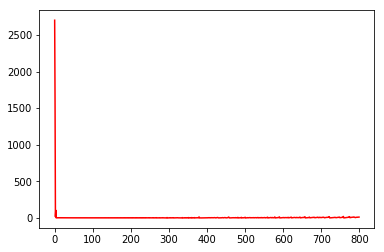

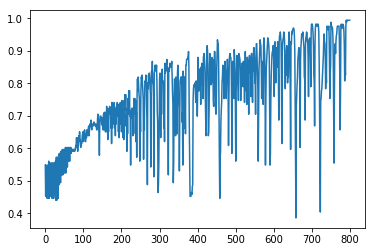

In [13]:
# plot mse and accuracy graph

plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [14]:
# print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ', (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.8333333


In [15]:
# Print the final mse

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE: %.4f' % sess.run(mse))

MSE: 11.6002


In [16]:
# Restore model and make predict

saver.restore(sess, model_path)
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(93, 101):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1, 60)})
    accuracy_run = sess.run(accuracy, feed_dict={x: X[i].reshape(1, 60), y_: test_y})
    print("Original: ", y1[i],"predicted: ",prediction_run,"Accuracy: ", accuracy_run )

INFO:tensorflow:Restoring parameters from C:\Users\hmnsh\repos\edureka\sonar
Original:  R predicted:  [1] Accuracy:  0.52380955
Original:  R predicted:  [0] Accuracy:  0.47619048
Original:  R predicted:  [0] Accuracy:  0.47619048
Original:  R predicted:  [1] Accuracy:  0.52380955
Original:  M predicted:  [0] Accuracy:  0.47619048
Original:  M predicted:  [1] Accuracy:  0.52380955
Original:  M predicted:  [0] Accuracy:  0.47619048
Original:  M predicted:  [0] Accuracy:  0.47619048
